In [30]:
from operator import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Coupled equations for angular momentum using the Inertial Tensor
def t_handle_derivs(I,x):
    I1=I[0]
    I2=I[1]
    I3=I[2]
    w1=x[0]
    w2=x[1]
    w3=x[2]
    dw1 = ((I2-I3)/I1)*w2*w3
    dw2 = ((I3-I1)/I2)*w3*w1
    dw3 = ((I1-I2)/I3)*w1*w2
    return [dw1, dw2, dw3]

In [3]:
# standard forward euler
def forward_euler(f,x,dt,I):
    a = f(I,x)
    b = list(map(mul,a,[dt,dt,dt]))
    x_new = list(map(add, x,b))
    return x_new

In [4]:
# plot angular velocities of each axis
def plot_results(w1,w2,w3,T):
    plt.plot(T,w1)
    plt.plot(T,w2)
    plt.plot(T,w3)
    plt.show()

In [5]:
# save angular velocity data to a csv file.
def save_csv(filename, w1, w2, w3):
    outfile = open(filename,'w')
    wtr = csv.writer(outfile)
    
    for i in range(len(w1)):
        wtr.writerow([w1[i],w2[i],w3[i]])
    outfile.close()


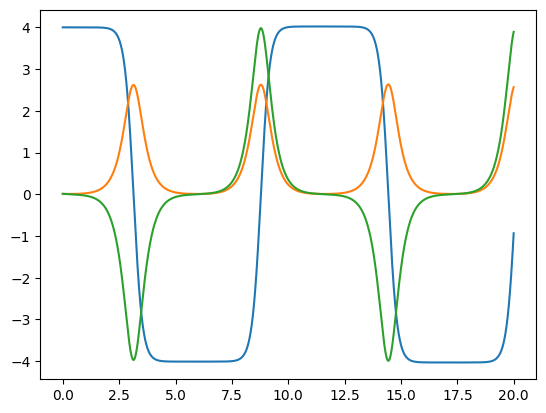

In [6]:
# initial conditions
I = [0.73651, 1.02945, 0.30164]  # Inertia Tensor for rigid body
x = [4,0.01, 0.01]               # initial angular velocity of principle axes
t = 0.001                        # simulation timestep
end = 20                         # simulation end time

# set up simulation outputs
w1_out = []
w2_out = []
w3_out = []
T = np.arange(0,end,t)

#run simulation
for i in T:
    x = forward_euler(t_handle_derivs, x, t, I)
    w1_out.append(x[0])
    w2_out.append(x[1])
    w3_out.append(x[2])

# plot results
plot_results(w1_out,w2_out,w3_out,T)


In [7]:
# save results to an output file
save_csv("t_handle_angular_vel.csv",w1_out,w2_out,w3_out)


In [38]:
q0_out = []
q1_out = []
q2_out = []
q3_out = []

# calculate the quaternion rotation from angular velocity
def quaternion_diffeq(omega):
    roll = omega[0]
    pitch = omega[1]
    yaw = omega[2]
    
    cr = np.cos(roll * 0.5)
    sr = np.sin(roll * 0.5)
    cp = np.cos(pitch * 0.5)
    sp = np.sin(pitch * 0.5)
    cy = np.cos(yaw * 0.5)
    sy = np.sin(yaw * 0.5)
    
    dq0 = cr * cp * cy + sr * sp * sy
    dq1 = sr * cp * cy - cr * sp * sy
    dq2 = cr * sp * cy + sr * cp * sy
    dq3 = cr * cp * sy - sr * sp * cy
    
    return [dq0, dq1, dq2, dq3]

q = [1,0,0,0] # all zero is an invalid rotation

for i in range(len(w1_out)):
    omega = [w1_out[i],w2_out[i],w3_out[i]]
    qdot = quaternion_diffeq(omega)
    q = list(map(add,q,qdot))
    print(qdot)
    
    q0_out.append(q[0])
    q1_out.append(q[1])
    q2_out.append(q[2])
    q3_out.append(q[3])

[-0.4161139301104807, 0.9092851461917426, 0.0024515663018923302, -0.0066113467416992686]
[-0.4161141583364578, 0.909285193901972, 0.0024374369334073504, -0.0065956261105451705]
[-0.4161143854006306, 0.9092852412956105, 0.0024233236574072786, -0.006579948866862607]
[-0.4161146113089756, 0.9092852883739071, 0.002409226381144945, -0.006564314907533628]
[-0.4161148360674388, 0.9092853351381033, 0.002395145011978839, -0.006548724129724519]
[-0.4161150596819372, 0.9092853815894316, 0.0023810794573724883, -0.006533176430885142]
[-0.41611528215835636, 0.909285427729117, 0.002367029624893863, -0.006517671708748259]
[-0.4161155035025522, 0.9092854735583756, 0.002352995422214764, -0.006502209861328856]
[-0.4161157237203515, 0.909285519078416, 0.0023389767571102152, -0.006486790786923487]
[-0.4161159428175504, 0.9092855642904382, 0.0023249735374578553, -0.006471414384109605]
[-0.41611616079991637, 0.9092856091956336, 0.0023109856712373376, -0.006456080551744894]
[-0.4161163776731875, 0.90928565379

[-0.6948540782697888, 0.5842741323239006, -0.41415868852914284, -0.06537682253532945]
[-0.6924374243330278, 0.5870930067397084, -0.4142640101380253, -0.0650964263591571]
[-0.6899970884583816, 0.5899087848368798, -0.4143772678730816, -0.0648314997610924]
[-0.6875331319601498, 0.5927212514761959, -0.41449831484166116, -0.06458217632584315]
[-0.6850456182309097, 0.5955301920861997, -0.41462700165930166, -0.06434858779664285]
[-0.6825346127292361, 0.5983353926937944, -0.41476317646833893, -0.06413086403915041]
[-0.68000018296695, 0.6011366399546215, -0.41490668495715655, -0.06392913300557942]
[-0.6774423984959002, 0.6039337211832049, -0.4150573703800683, -0.0637435206990643]
[-0.6748613308942819, 0.606726424382851, -0.4152150735778344, -0.06357415113827788]
[-0.6722570537524983, 0.6095145382753, -0.41537963299880554, -0.06342114632230905]
[-0.6696296426585664, 0.6122978523301114, -0.4155508847206925, -0.06328462619581074]
[-0.6669791751830757, 0.6150761567937776, -0.4157286624729578, -0.06

In [39]:
def plot_quaternions(T, q0, q1, q2, q3):
    plt.plot(T,q0)
    plt.plot(T,q1)
    plt.plot(T,q2)
    plt.plot(T,q3)
    plt.show()

/Users/ryan/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/matplotlib/ticker.py:2101: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


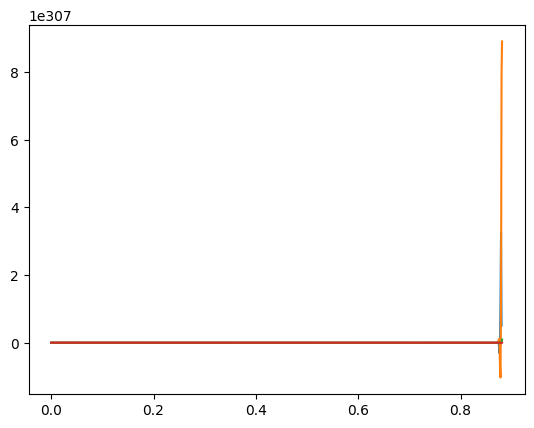

In [11]:
plot_quaternions(T, q0_out, q1_out, q2_out, q3_out)

In [37]:
# save angular velocity data to a csv file.
def save_quat_csv(filename, q0, q1, q2, q3):
    outfile = open(filename,'w')
    wtr = csv.writer(outfile)
    
    for i in range(len(q0)):
        wtr.writerow([q0[i],q1[i],q2[i],q3[i]])
    outfile.close()

In [40]:
save_quat_csv("T-handle_quat.csv",q0_out,q1_out,q2_out,q3_out)

-0.27941549819892586